In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
import random
import shutil
import numpy as np

In [3]:
# Set random seed for reproducibility
random.seed(42)
tf.random.set_seed(42)

# Function to create train, validation, and test sets
def create_dataset_splits(source_dir, train_dir, val_dir, test_dir, num_train, num_val, num_test):
    for dir in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(dir, 'cats'), exist_ok=True)
        os.makedirs(os.path.join(dir, 'dogs'), exist_ok=True)

    for animal in ['cat', 'dog']:
        animal_files = [f for f in os.listdir(source_dir) if f.startswith(animal)]
        random.shuffle(animal_files)

        for i, file in enumerate(animal_files):
            if i < num_train:
                shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, f'{animal}s', file))
            elif i < num_train + num_val:
                shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, f'{animal}s', file))
            elif i < num_train + num_val + num_test:
                shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, f'{animal}s', file))
            else:
                break

    print(f"Train set: {len(os.listdir(os.path.join(train_dir, 'cats'))) + len(os.listdir(os.path.join(train_dir, 'dogs')))} images")
    print(f"Validation set: {len(os.listdir(os.path.join(val_dir, 'cats'))) + len(os.listdir(os.path.join(val_dir, 'dogs')))} images")
    print(f"Test set: {len(os.listdir(os.path.join(test_dir, 'cats'))) + len(os.listdir(os.path.join(test_dir, 'dogs')))} images")


# Create dataset splits
source_dir = 'D:/Test/Deep_Learning/Assignment_2/dogs-vs-cats/train'
train_dir = 'D:/Test/Deep_Learning/Assignment_2/dataset/train'
val_dir = 'D:/Test/Deep_Learning/Assignment_2/dataset/validation'
test_dir = 'D:/Test/Deep_Learning/Assignment_2/dataset/test'

create_dataset_splits(source_dir, train_dir, val_dir, test_dir, 1000, 500, 500)


Train set: 2000 images
Validation set: 1000 images
Test set: 1000 images


In [4]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

validation_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(150, 150),
                                                            batch_size=32, class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                      batch_size=32, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 898ms/step - accuracy: 0.4742 - loss: 1.1031 - val_accuracy: 0.5030 - val_loss: 0.6937
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 883ms/step - accuracy: 0.5290 - loss: 0.6915 - val_accuracy: 0.5810 - val_loss: 0.6580
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 862ms/step - accuracy: 0.5807 - loss: 0.6698 - val_accuracy: 0.6060 - val_loss: 0.6542
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 857ms/step - accuracy: 0.6112 - loss: 0.6526 - val_accuracy: 0.6470 - val_loss: 0.6299
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 820ms/step - accuracy: 0.6528 - loss: 0.6322 - val_accuracy: 0.5670 - val_loss: 0.7026
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 840ms/step - accuracy: 0.5846 - loss: 0.6603 - val_accuracy: 0.6060 - val_loss: 0.6493
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 830ms/step - accuracy: 0.6065 - loss: 0.6407 - val_accuracy: 0.5850 - val_loss: 0.6707
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 818ms/step - accuracy: 0.5681 - loss: 0.6741 - val_accuracy: 0.634

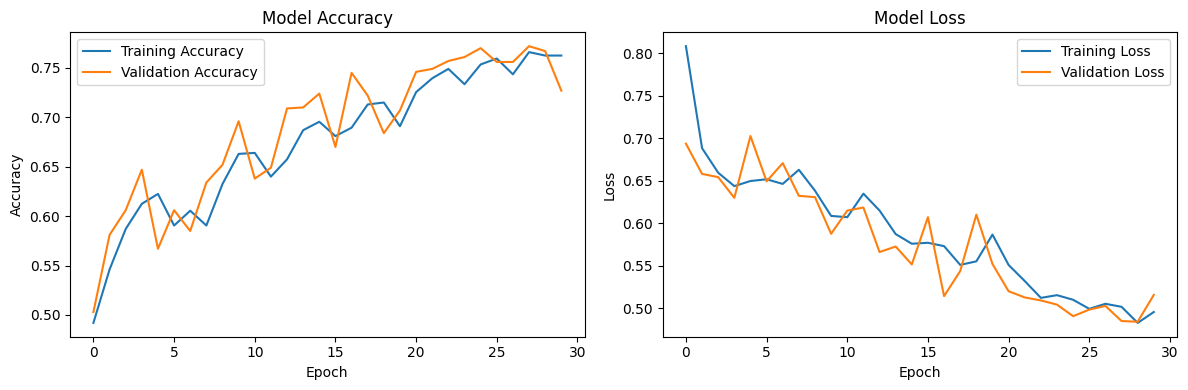

Best epoch: 28
Best validation accuracy: 0.7720
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.7579 - loss: 0.4976
Test accuracy: 0.7640


In [9]:

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Find the best epoch
best_epoch = np.argmax(history.history['val_accuracy']) + 1
print(f"Best epoch: {best_epoch}")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")